# ***Importing Python Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ***Loading Data***

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Kmean_dataset.csv')
data.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.shape

(178, 13)

In [ ]:
label = data.iloc[0:178,0:13].values
X=label


# ***Defining Function For Clustering***

In [ ]:
class KMeansClustering:

  def __init__(self, k = 13):
    self.k = k
    self.centroids = None

  @staticmethod
  def euclidean_distance(data_point, centroids):
    return np.sqrt(np.sum((centroids - data_point)**2, axis=1))

  def fit(self, X, max_iterations=200):
    self.centroids = np.random.uniform(np.amin(X,axis=0), np.amax(X,axis=0),
                                       size=(self.k, X.shape[1]))

    for _ in range(max_iterations):
      y = []

      for data_point in X:
        distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
        cluster_num = np.argmin(distances)
        y.append(cluster_num)

      y = np.array(y)

      cluster_indices = []

      for i in range(self.k):
        cluster_indices.append(np.argwhere(y == i))

      cluster_centers = []

      for i, indices in enumerate(cluster_indices):
        if len(indices) == 0:
          cluster_centers.append(self.centroids[i])
        else:
          cluster_centers.append(np.mean(X[indices], axis= 0)[0])

      if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
        break
      else:
        self.centroids = np.array(cluster_centers)


    return y










# ***Plotting Graph to Look at the clusters***

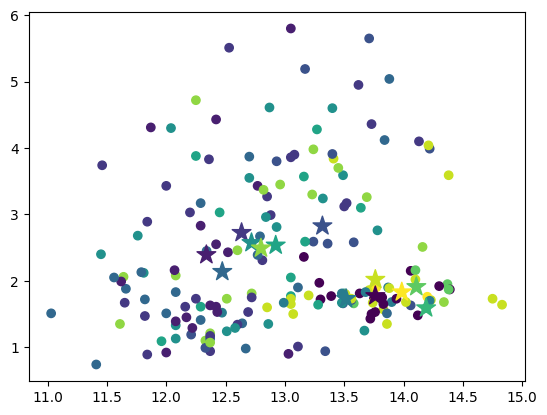

In [ ]:
kmeans = KMeansClustering(k=13)
labels = kmeans.fit(X)

plt.scatter(X[:,0], X[:, 1], c=labels)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1], c=range(len(kmeans.centroids)),
            marker="*", s=200)
plt.show()



In [ ]:
# kmeans.centroids[:,0]

array([13.761875  , 12.33823529, 12.63481481, 13.31615385, 12.47227273,
       13.51571429, 12.71842105, 12.9225    , 14.19      , 14.1075    ,
       12.79833333, 13.762     , 13.985     ])